In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Simple linear regresion
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Sal_vs_Exp.csv')
print(dataset)
x = dataset[['Years of Experience']]
y = dataset['Salary']

      Years of Experience  Salary
0                       0    1036
1                       0    1041
2                       0    1054
3                       0    1069
4                       0    1110
...                   ...     ...
4995                   29   99841
4996                   29   99934
4997                   29   99940
4998                   29   99941
4999                   29   99980

[5000 rows x 2 columns]


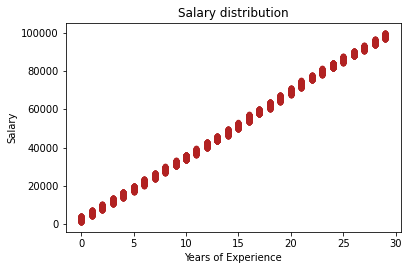

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))

dataset.plot(
    x    = 'Years of Experience',
    y    = 'Salary',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax)

ax.set_title('Salary distribution');
plt.show()


In [6]:
corr_test = pearsonr(x = dataset['Years of Experience'], y =  dataset['Salary'])
print("pearson's coeficient correlation: ", corr_test[0])
print("P-value: ", corr_test[1])

pearson's coeficient correlation:  0.9992745685977932
P-value:  0.0


# **MODEL BUILDING**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x.values.reshape(-1,1),
                                                    y.values.reshape(-1,1),
                                                    test_size = 1/3,
                                                    random_state= 1234,
                                                    shuffle=True)

model = LinearRegression()
model.fit(X= x_train.reshape(-1,1), y= y_train)

LinearRegression()

In [9]:
print(x_train.shape)
print(y_train.shape)

(3333, 1)
(3333, 1)


In [10]:
print('intercept: ', model.intercept_)
print('coeficiente: ', list(zip(x.columns,model.coef_.flatten(),)))
print('R^2: ',model.score(x,y))
print("==================================")
# model test error 
# ==============================================================================
pred = model.predict(X = x_test)
print(pred[0:3,])
print("==================================")
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred)
print("")
print(f"the (rmse) test error is: {rmse}")

intercept:  [1928.24104939]
coeficiente:  [('Years of Experience', 3343.4598406882665)]
R^2:  0.9985486995191352
[[55423.5985004 ]
 [48736.67881903]
 [25332.45993421]]

the (rmse) test error is: 1223068.0310047166


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


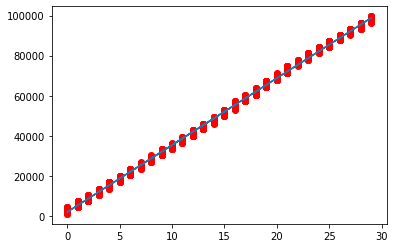

In [11]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test, pred)
plt.show()

In [12]:
X_train = sm.add_constant(x_train, prepend=True)
model2 = sm.OLS(endog=y_train, exog=X_train)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.287e+06
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:37:07   Log-Likelihood:                -28064.
No. Observations:                3333   AIC:                         5.613e+04
Df Residuals:                    3331   BIC:                         5.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1928.2410     37.272     51.735      0.0

# **SAVE & LOAD THE MODEL**

In [13]:
linear_reg = open("reg_model.pkl","wb")          
pickle.dump(model,linear_reg)           
linear_reg.close()      

In [14]:
salary_model = open("reg_model.pkl","rb")           
s_model = pickle.load(salary_model)           
s_model

LinearRegression()

In [15]:
exp = np.array([[2], [7]])
s_model.predict(exp)

array([[ 8615.16073077],
       [25332.45993421]])

In [16]:
e = np.array([10])
s_model.predict(e.reshape(1, -1))

array([[35362.83945627]])